/home/anuj/anaconda3/lib/python3.12/site-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /home/anuj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/anuj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


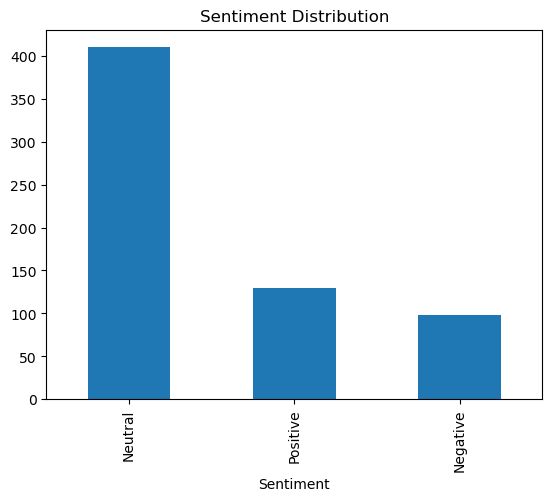


Top Topics:
Topic 0: 0.012*"india" + 0.005*"first" + 0.005*"pharma" + 0.005*"new" + 0.005*"stock" + 0.005*"trade" + 0.003*"killed" + 0.003*"hold" + 0.003*"markets" + 0.003*"says"
Topic 1: 0.007*"india" + 0.006*"indias" + 0.005*"indian" + 0.005*"new" + 0.005*"asia" + 0.005*"cup" + 0.005*"woman" + 0.004*"watch" + 0.004*"trump" + 0.003*"win"
Topic 2: 0.013*"tech" + 0.008*"life" + 0.006*"says" + 0.004*"india" + 0.004*"watch" + 0.004*"deal" + 0.004*"crore" + 0.004*"war" + 0.004*"trump" + 0.004*"indian"
Topic 3: 0.008*"says" + 0.005*"iran" + 0.005*"trump" + 0.005*"new" + 0.005*"sanctions" + 0.005*"paise" + 0.004*"minister" + 0.004*"israel" + 0.004*"billion" + 0.004*"rupee"
Topic 4: 0.012*"india" + 0.011*"says" + 0.011*"tiktok" + 0.008*"trump" + 0.007*"deal" + 0.004*"done" + 0.004*"claims" + 0.004*"watch" + 0.004*"china" + 0.004*"study"
Analysis done. Results saved in news_text_analysis.csv


In [1]:
# Dataset used : https://raw.githubusercontent.com/a-anuj/fods-case-study/refs/heads/main/webscraping_dataset.csv
# Dataset Generated : https://raw.githubusercontent.com/a-anuj/fods-case-study/refs/heads/main/news_text_analysis.csv

import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from textblob import TextBlob
from gensim import corpora, models
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")

df = pd.read_csv("https://raw.githubusercontent.com/a-anuj/fods-case-study/refs/heads/main/webscraping_dataset.csv")


stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)  
    text = re.sub(r"[^a-z\s]", "", text)       
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    return " ".join(tokens)

df["Cleaned_Text"] = df["Headline"].apply(clean_text)

def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0: 
        return "Positive"
    elif polarity < 0: 
        return "Negative"
    else: 
        return "Neutral"

df["Sentiment"] = df["Cleaned_Text"].apply(get_sentiment)

df["Sentiment"].value_counts().plot(kind="bar", title="Sentiment Distribution")
plt.show()


texts = [t.split() for t in df["Cleaned_Text"] if isinstance(t, str)]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

print("\nTop Topics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


df.to_csv("news_text_analysis.csv", index=False, encoding="utf-8-sig")
print("Analysis done. Results saved in news_text_analysis.csv")
